# Import libraries

In [2]:
import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

#1- Prepare datasets




## 1.1- Create points in a 2D-space
This section creates a datset for testing functions defined in the following. Some important variables are explained as follows:
1. cluster1, cluster2, etc: are numpy-arrays; they contains points in 2D-space. The number of points in those arrays are N1, N2, etc, respectively.
2. prototypes: a list of numpy-arrays; here, it is a list of cluster1, cluster2, etc.
3. X: a numpy-array of shape (NX, 2); each row in this array is a 2D-point.

In [3]:
N1 = 4
N2 = 5
N3 = 5
NX = 3

np.random.seed(100)
cluster1 = np.random.normal((-5,-5), 3.0, (N1, 2))
cluster2 = np.random.normal((5,-5), 3.5, (N2, 2))
cluster3 = np.random.normal((0,5), 2.5, (N3, 2))
prototypes = [cluster1, cluster2, cluster3]
X = np.random.normal((0,0), 3.5, (NX, 2))

print("Points in cluster1, cluster2, cluster2: ");
for a in prototypes:
  print(a)
  print()
print("Points in X: "); print(X)

Points in cluster1, cluster2, cluster2: 
[[-10.24929642  -3.97195879]
 [ -1.54089259  -5.75730811]
 [ -2.05603764  -3.45734348]
 [ -4.33646099  -8.21012999]]

[[ 4.33676459 -4.10749495]
 [ 3.39690555 -3.47692779]
 [ 2.95741732 -2.14103525]
 [ 7.35452282 -5.365439  ]
 [ 3.14051868 -1.3959356 ]]

[[-1.09533906  2.20420438]
 [ 4.04745415  8.85401294]
 [-0.62969785  2.89391065]
 [ 0.46129673  7.3427055 ]
 [ 1.82750086  8.40389031]]

Points in X: 
[[-1.14183321  0.19486605]
 [ 0.77839863 -5.05125948]
 [-2.64723307  2.85758904]]


## 1.2- Question: Define functions to visualize the dataset
The following cell contains code for visualizing the input data.
* Parameters:
  * prototypes: list of clusters mentioned above; each cluster is array of 2D-points
  * X: array 2D-points
  * points2idx: a function that assign the cluster index to each point. You may pass function **nearest** or **knn** defined in the following sections. In the case that you need to visualize the points in **prototypes** and **X** only, pass **None** to **points2idx**

* Questions:
  1. fill code as **#YOUR CODE IS HERE** to help **show_dataset** be able to show the figure as shown in the following sections.

In [4]:
def show_dataset(prototypes:list, X:np.array,
                 points2idx=None,
                 figsize=(8,6)):
  pmarkers =  ['o', 's', 'D', 'p', '8', '^']
  pcolors =   ['b', 'g', 'm', 'c', 'y', 'p']
  xmarker = '*'
  xcolor  = 'r'

  plt.figure(figsize=figsize)
  for idx, cluster in enumerate(prototypes):
    #YOUR CODE HERE: to show points in cluster
    plt.scatter(
                x=cluster[:,0],
                y=cluster[:,1],
                s=50,
                color = pcolors[idx],
                marker = pmarkers[idx],
                label='Cluster {}'.format(idx + 1))
    #YOUR CODE HERE: to show points in X
  plt.scatter(
              x=X[:,0],
              y=X[:,1],
              s=50,
              color=xcolor,
              marker=xmarker,
              label='Unknown')
  if points2idx is not None:
    points = np.concatenate(prototypes + [X], axis=0)
    xmin, ymin = points.min(axis=0)
    xmax, ymax = points.max(axis=0)
    padx, pady = 0.1*(xmax - xmin), 0.1*(ymax - ymin)

    xx, yy = np.meshgrid(np.arange(xmin - padx, xmax + padx, 0.01),
                         np.arange(ymin - pady, ymax + pady, 0.01))
    pts = np.hstack((xx.reshape(-1,1), yy.reshape(-1,1)))
    labels = points2idx(pts, prototypes)
    zz = labels.reshape(xx.shape)

    ax = plt.gca()
    #YOUR CODE HERE: to draw contour xx, yy, zz
    ax.contourf(
            xx, yy, zz,
            colors = pcolors + [xcolor],
            levels=[-1] + np.arange(len(prototypes) + 1).tolist(), alpha=0.4)
  plt.xlabel('x')
  plt.ylabel('y')
  #YOUR CODE HERE: to show the legend
  # plt.legend(labels = ['Cluster 1', 'Cluster 2', 'Cluster 3'], loc='best')
  plt.legend()
  plt.title("Prototypes and unknown points")
  #plt.axis("equal")
  plt.show()

## 1.2.1 - test show_dataset

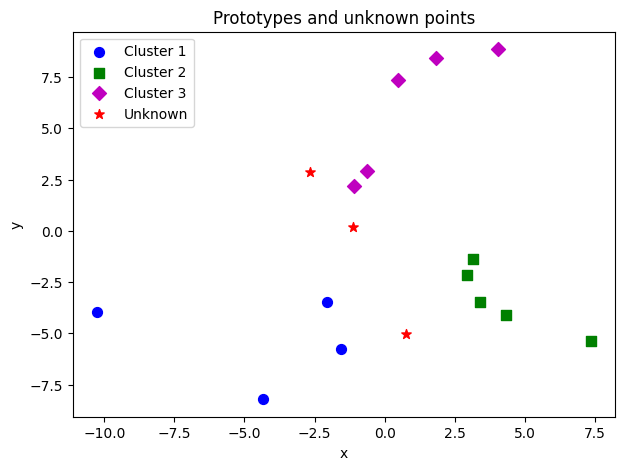

In [5]:
show_dataset(prototypes, X, figsize=(7,5))

#2- Question: implement **nearest**
* Parameters:
  1. **X**: points (unknown: we do not know to which clusters each point should belong)
  2. **prototypes**: list of clusters, each cluster is array of 2D-points
    * IMPORANT NOTE: the cluster's index is the index of the cluster in **prototypes** (list)
* Goal:
  * **nearest** assign the cluster index for each point in **X**
* return:
  * numpy-array of indices; each index is for a point in X


* Question:
  1. Fill code to implement **nearest**

In [6]:
def nearest(X, prototypes):
  #YOUR CODE HERE
  # label for each point in prototypes
  cluster_label = []
  for i in range(len(prototypes)):
    cluster_label += [i] * len(prototypes[i])
  cluster_label = np.array(cluster_label)
  ravel_points = np.concatenate(prototypes)
  # find the nearest cluster for each point in X
  nearest_point_idx = np.argmin(np.linalg.norm(X[:, None] - ravel_points, axis=2), axis=1)
  return cluster_label[nearest_point_idx]

## 2.1- Test **nearest**

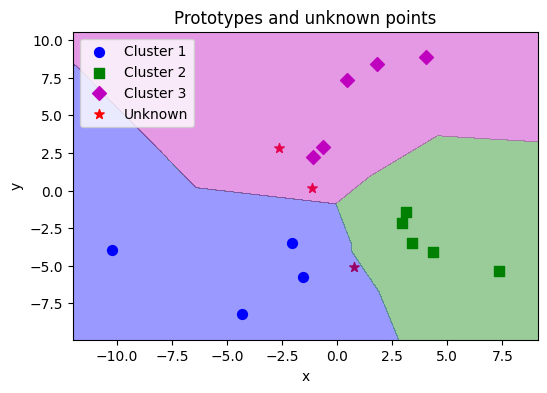

In [7]:
show_dataset(prototypes, X, points2idx=nearest, figsize=(6,4))

#3- Question: implement **KNN**
* Parameters:
  1. **X**: points (unknown: we do not know to which clusters each point should belong)
  2. **prototypes**: list of clusters, each cluster is array of 2D-points
    * IMPORANT NOTE: the cluster's index is the index of the cluster in **prototypes** (list)
  3. **k** number of points nearest to each point in X to be selected and determine the cluster's index
* Goal:
  * **knn** assign the cluster index for each point in **X**
* return:
  * numpy-array of indices; each index is for a point in X


* Question:
  1. Fill code to implement **knn**
  * Guideline:
    * compute the distances from point in X to every points in clusters
    * use np.argsort to sort the distances and select k smallest distances for each point in X
    * assign the cluster's index for each selected distance
    * use np.bincount and np.argmax to select the cluster's index having the largest number of votes (comprehension with bincount)



In [8]:
def knn(X, prototypes:list, k=3):
  #YOUR CODE HERE

  # label for each point in prototypes
  cluster_label = []
  for i in range(len(prototypes)):
    cluster_label += [i] * len(prototypes[i])
  cluster_label = np.array(cluster_label)
  ravel_points = np.concatenate(prototypes)
  # find the k nearest cluster for each point in X
  nearest_point_idx = np.argsort(np.linalg.norm(X[:, None] - ravel_points, axis=2), axis=1)[:, :k]
  nearest_cluster_idx = cluster_label[nearest_point_idx]
  return np.array([np.argmax(np.bincount(nearest_cluster_idx[i])) for i in range(len(X))])

## 3.1- Test **knn**

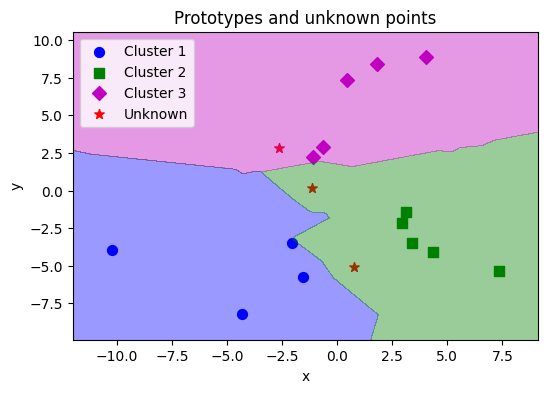

In [ ]:
show_dataset(prototypes, X, points2idx= lambda pts, proto: knn(pts, proto, 5), figsize=(6,4))

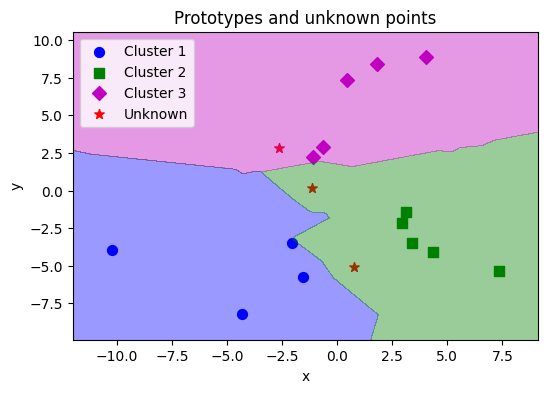

In [9]:
show_dataset(prototypes, X, points2idx= lambda pts, proto: knn(pts, proto, 5), figsize=(6,4))